# Analiza szans na przeżycie katastrofy Titanica każdego z pasażerów przy użyciu algorytmów uczenia maszynowego

Należy dokonać analizy danych - listy pasażerów Titanica:

1. Przegląd, analiza oraz wyczyszczenie/uzupełnienie danych. 

2. Wybór istniejących cech. Znalezienie powiązań, wzorców. 

3. Tworzenie modelu i przewidywanie wartości. Pytanie na które ma odpowiedzieć model: "Jakie szanse ma pasażer przeżycia katastrofy?"

4. Sprawdzenie działania modelu

# 1. Czytanie danych

Na wstępie należało przeczytać trzy pliki z danymi zawierającymi informację o przeżyciu katastrofy (gender_submission.csv) oraz dane pasażerów (treningowe - train.csv, oraz testowe - test.csv):

In [1]:
import pandas as pd
import numpy as np 
import os

home_path = os.getcwd()
data_path = os.path.join(home_path,'dane/')

file_names = ['train.csv','test.csv','gender_submission.csv']
file_paths = list()

for i in file_names:
    path = os.path.join(data_path,i)
    file_paths.append(path)

df_list = []
for fp in file_paths:
    df_list.append(pd.read_csv(fp))
    
df_list[0].head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
df_list[1].head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [3]:
df_list[2].head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [4]:
df_list[0].shape, df_list[1].shape, df_list[2].shape

((891, 12), (418, 11), (418, 2))

In [5]:
df_list[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Opis danych:

Dane zawierające informacje o pasażerach składały się z 11 kolumn zawierających informacje. Były nimi:
> 1. __PassengerId__- indywidualny identyfikator pasażera
> 2. __Pclass__ - klasa (przyjmowane wartości 1,2,3, gdzie 1 - klasa najwyższa)
> 3. __Name__ - imię pasażera
4. __Sex__ - płeć pasażera
5. __Age__ - wiek pasażera
6. __SibSp__ - skrót od "Siblings/Spouses" - ilość członków rodziny tego samego pokolenia (rodzeństwo/małżonkowie)
7. __Parch__ - skrót od "Parents/Children" - ilość członków rodziny z różnego pokolenia (rodzice/dzieci)
8. __Ticket__ - numer biletu
9. __Fare__ - koszt biletu
10. __Cabin__ - numer kabiny
11. __Embarked__- jedno z trzech miejsc zaokrętowania (Southampton/Cherbourg/Queenstown)

W danych treningowych 12tą kolumnę stanowiła informacja o przeżyciu. Z kolei dane o przeżyciu zawierały identifikator pasażera(__PassengerID__) i zero-jedynkową informację o przeżyciu katastrofy (__Survival__). 

# 2. Oczyszczanie danych 

### 2.1. Ustalenie __PassengerId__ jako indeksu tabeli:

In [6]:
train = df_list[0].set_index('PassengerId')
x_test = df_list[1].set_index('PassengerId')
y_test = df_list[2].set_index('PassengerId') 
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [7]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 2.2. Usunięcie kolumn potencjalnie nieprzydatnych:

Usunięte zostały kolumny __Name,Ticket,Cabin__, gdyż każda z nich zawierała unikalne wartości, i nie niosły one ze sobą żadnych potencjalnych wskazówek odnośnie przeżywalności katastrofy. Dodatkowo kolumna __Cabin__ zawierała bardzo dużo nieuzupełnionych pól. 

In [8]:
train.drop(columns=['Name','Ticket','Cabin'], inplace=True)
x_test.drop(columns=['Name','Ticket','Cabin'], inplace=True)

#removing null embark
train = train[~train.Embarked.isnull()]
x_test = x_test[~x_test.Embarked.isnull()]

train.head()
train.shape

(889, 8)

### 2.3. Wyróżnienie zbioru rozwiązań

Z tabeli zawierającej informacje o pasażerach (__train__) wyłączono kolumnę __Survival__ i stworzono nową strukturę zawierającą informację o przeżyciu katastrofy pasażerów ze zbioru treningowego (__y_train__).  

In [9]:
y_train =pd.DataFrame(train.Survived)
y_train.head()

Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0

In [10]:
train.drop(columns=['Survived'],inplace=True)
x_train = train
del train
x_train.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                      
1                 3    male  22.0      1      0   7.2500        S
2                 1  female  38.0      1      0  71.2833        C
3                 3  female  26.0      0      0   7.9250        S
4                 1  female  35.0      1      0  53.1000        S
5                 3    male  35.0      0      0   8.0500        S

### 2.4. Identyfikacja brakujących danych:

Kolejnym etapem przygotowania danych było sprawdzenie w jakich kolumnach oraz w jakiej ilości brakuje danych. Okazało się, że w 177 rekordach zbioru treningowego oraz 86 zbioru testowego brakuje informacji o wieku pasażera. Jest to potencjalnie ważna informacja, mogąca w znaczący sposób wpływać na uzyskane rezultaty, toteż postanowiono w obu zbiorach usunąć dane wiersze. 

Usunięte wiersze zapisano w osobnej strukturze, natomiast nowe, niemal w pełni przygotowane zbiory danych treningowych i testowych nazwano odpowiednio __x_train_clear__ i __x_test_clear__, oraz odpowiadające im zbiory wartości wynikowych __y_train_clear__ i __y_test_clear__.

In [11]:
#null values - what to do with that
print(x_train.isnull().sum())
print(x_test.isnull().sum())

#177 wierszy z pustym wiekiem, mogą się przydać, dlatego zapisuję w innej DataFrame
nullAge = x_train[x_train.Age.isnull()].index.tolist() #indeksy wierszy z zerowym wiekiem
notNullAge = x_train[~x_train.Age.isnull()].index.tolist() #indeksy wierszy z niezerowym wiekiem

x_train_clear = x_train[~x_train['Age'].isnull()]
x_train_nullAge = x_train[x_train['Age'].isnull()]
x_test_clear = x_test[~x_test['Age'].isnull()]

y_train_clear = y_train[~x_train['Age'].isnull()]
y_train_nullAge = y_train[x_train['Age'].isnull()]
y_test_clear = y_test[~x_test['Age'].isnull()]

#sprawdzenie
x_train_clear.isnull().values.any() # nie ma żadnych pustych wartości
x_train_clear.isnull().sum()
x_test_clear.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

Okazało się, że w zbiorze testowych brakuje w jednym wierszu informacji __Fare__, dlatego rekord ten został usunięty.

In [12]:
x_test_clear = x_test_clear[~x_test.Fare.isnull()]
y_test_clear = y_test_clear[~x_test.Fare.isnull()]
x_test_clear.isnull().sum()

/Users/mateuszmieczkowski/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/mateuszmieczkowski/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2.5. Zastąpienie danych odpowiadających kategoriom danymi binarnymi  (One-Hot Encoding)

Na potrzeby większości algorytmów uczenia maszynowego dane wejściowe muszą najczęściej przyjmować formy numeryczne. Dwie z kolumn odpowiadające płci oraz miejscu zaokrętowania (__Sex__ oraz __Embarked__) zawierały dane w postaci ciągu znaków. Należało zatem przekształcić dane w taki sposób, aby zawierały one jedynie wartości 0 bądź 1. Posłużono się w tym celu metodą __get_dummies__. 

Powstały w ten sposób trzy nowe kolumny zamiast jednej __Embark__ oraz dwie odpowiadające płci. Jako, że dopuszczalna ilość płci wynosiła dwa, dane te stanowiły niejako wzajemną duplikację, dlatego możliwe (wskazane) było usunięcie jednej z nich. 

Postały nowe struktury danych __x_train_clear_ohc__ oraz __x_test_clear_ohc__. 

In [13]:
#one hot encoding - kolumny w których są obiekty typu string
mask_train = x_train_clear.dtypes ==np.object
mask_test = x_test_clear.dtypes ==np.object

categorical_cols_train = x_train_clear.columns[mask_train]
categorical_cols_test = x_test_clear.columns[mask_test]
x_train_clear_ohc = x_train_clear.copy()
x_test_clear_ohc = x_test_clear.copy()

x_train_clear_ohc = pd.get_dummies(x_train_clear_ohc, columns=categorical_cols_train)
x_test_clear_ohc = pd.get_dummies(x_test_clear_ohc, columns = categorical_cols_test)

#można wyrzucić Sex_female bądź Sex_male bo uzupełnia tylko inną kolumnę, silna korelacja
x_train_clear_ohc.drop(columns='Sex_male', inplace=True)
x_test_clear_ohc.drop(columns='Sex_male', inplace = True)
x_train_clear_ohc.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_C  \
PassengerId                                                                
1                 3  22.0      1      0   7.2500           0           0   
2                 1  38.0      1      0  71.2833           1           1   
3                 3  26.0      0      0   7.9250           1           0   
4                 1  35.0      1      0  53.1000           1           0   
5                 3  35.0      0      0   8.0500           0           0   

             Embarked_Q  Embarked_S  
PassengerId                          
1                     0           1  
2                     0           0  
3                     0           1  
4                     0           1  
5                     0           1

# 3. Analiza danych

Dane zostały wyczyszczone z niepotrzebnych oraz brakujących informacji, toteż możliwe było przejście do ich analizy oraz wyszukiwania zależności. W pierwszej kolejności sprawdzono jaka liczba pasażerów zbioru treningowego przeżyła, a jaka nie przeżyła katastrofy. 

In [14]:
y_train_clear.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

Dane o unikalności rekordów zapisano w strukturze __vc__. 

In [15]:
cols = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']

vc ={}

for col in cols:
    vc[col] = pd.DataFrame(x_train_clear[col].value_counts())
    
vc['Pclass'].sort_index()

Pclass
1     184
2     173
3     355

### 3.1. Analiza wpływu wieku na przeżywalność

Na wstępie rozważono wprowadzenie dodatkowej informacji związanej z pełnoletnością pasażera. Przypuszczalnie największe szanse na przeżycie katastrofy miały kobiety oraz dzieci, dlatego postanowiono podzielić zbiór na dwie grupy wiekowe o granicy 18 lat. W nich sprawdzono szanse na przeżycie z podziałem na płci. 

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

sns.set_context('notebook')

%matplotlib inline 
warnings.filterwarnings('ignore')

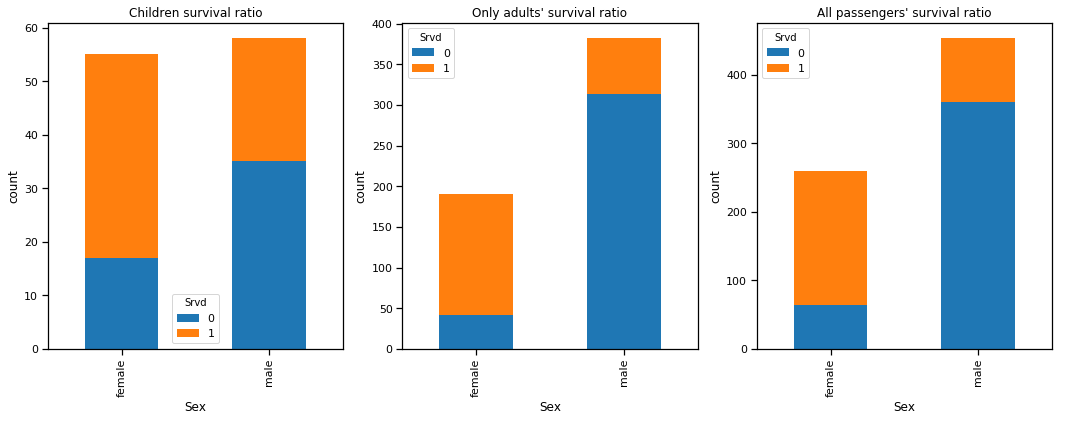

In [17]:
#badanie dzieci
x=x_train_clear.copy()
x['Srvd']=y_train_clear.Survived
children= x[x.Age<18].groupby(['Sex','Srvd'])['Srvd'].count().unstack()

adults = x[x.Age>18].groupby(['Sex','Srvd'])['Srvd'].count().unstack()
all_passengers = x.groupby(['Sex','Srvd'])['Srvd'].count().unstack()

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
children.plot(kind='bar',stacked=True,ax=ax1)
ax1.set(title='Children survival ratio', ylabel='count')
adults.plot(kind='bar',stacked=True, ax=ax2)
ax2.set(title='Only adults\' survival ratio', ylabel='count')
all_passengers.plot(kind='bar', stacked=True, ax=ax3)
ax3.set(title='All passengers\' survival ratio', ylabel='count')
plt.show()

Przeżywalność dzieci okazała się był inna niż dorosłych, zwłaszcza porównując płeć męską powyżej granicy pełnoletności. Zauważono, iż w dalszym ciągu istotne było rozróżnienie płci, chłopcy przeżywali rzadziej niż dziewczynki. Odrzucono zatem pomysł umieszczenia dzieci w jednej kategorii bez względu na płeć. Tym niemniej dodano kolumnę __Adult__ (0-1).

In [18]:
x_train_clear_ohc['Adult']=np.where(x_train_clear.Age>18,1,0)
x_test_clear_ohc['Adult']=np.where(x_test_clear.Age>18,1,0)
x_train_clear_ohc.sample(5)

Pclass   Age  SibSp  Parch      Fare  Sex_female  Embarked_C  \
PassengerId                                                                 
326               1  36.0      0      0  135.6333           1           1   
45                3  19.0      0      0    7.8792           1           0   
817               3  23.0      0      0    7.9250           1           0   
765               3  16.0      0      0    7.7750           0           0   
764               1  36.0      1      2  120.0000           1           0   

             Embarked_Q  Embarked_S  Adult  
PassengerId                                 
326                   0           0      1  
45                    1           0      1  
817                   0           1      1  
765                   0           1      0  
764                   0           1      1

### 3.2. Opis ilościowy zawierający minimalne, maksymalne oraz średnie wartości dla informacji możliwych do opisania numerycznie

In [19]:
x_train_clear[['Age','SibSp','Parch','Fare']].agg(['mean','min','max']).round(2)

Age  SibSp  Parch    Fare
mean  29.64   0.51   0.43   34.57
min    0.42   0.00   0.00    0.00
max   80.00   5.00   6.00  512.33

### 3.3. Szanse przeżycia katastrofy ze względu na płeć.

Przedstawiony poniżej wykres kołowy przedstawia bezwzględny podział pasażerów ze względu na płeć oraz procentowe szanse na przeżycie katastrofy. 

Mężczyźni stanowili niemal 2/3 wszystkich pasażerów. Na 5 mężczyzn na pokładzie 4 straciło życie w katastrofie (przeżywalność 20,5%) podczas gdy dla kobiet przeżywalność wynosiła niemal 75%. 

Całkowity udział osób które przeżyły katastrofę wyniósł niewiele ponad 40%, z czego ponad 2/3 stanowiły kobiety.

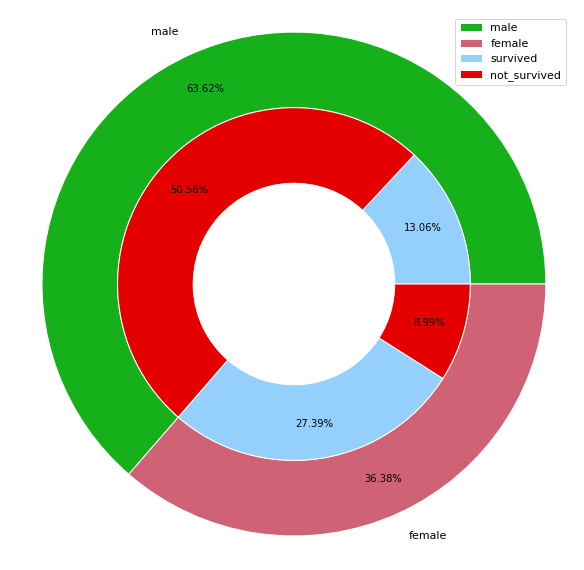

In [20]:
y_train_clear['Sex_female']=x_train_clear_ohc['Sex_female']
y_train_clear.groupby('Sex_female').sum()

a=pd.DataFrame(y_train_clear.groupby('Sex_female').sum())
a['total']=y_train_clear.Sex_female.value_counts()
a['not_survived']=a['total']-a['Survived']

fig = plt.figure(num=1, figsize=(10,10))
plt.pie(a.total, radius=1,
        colors=['xkcd:green', 'xkcd:rose'],
        labels=['male', 'female'], autopct='%.2f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.3, edgecolor='white'))

plt.pie(a[['Survived','not_survived']].values.flatten().tolist(), radius=0.7,
        colors=['xkcd:light blue', 'xkcd:red', 'xkcd:light blue',
                'xkcd:red'],
        wedgeprops=dict(width=0.3, edgecolor='white'), autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4)
plt.axis('equal')
plt.legend(['male','female','survived','not_survived'],loc='best')
plt.show()

### 3.4. Ilość pasażerów w danej klasie oraz z danego miejsca zaokrętowania.

Jak przedstawiono na poniższych wykresach, niemal połowa pasażerów podróżowała w klasie 3, przy w przybliżeniu wyrównanej ilości w klasach 1 i 2. Zdecydowana większość została zaokrętowana w Southampton. 

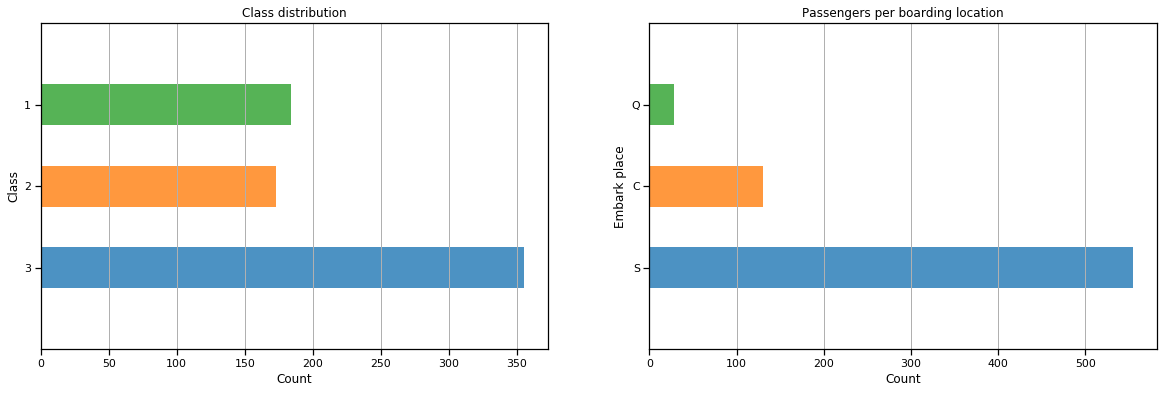

In [21]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
x_train_clear.Pclass.value_counts().sort_index(ascending=False).plot(kind="barh", alpha=0.8,ax=ax1)
ax1.grid(axis='x')
ax1.set_ylim(-1, len(x_train_clear.Pclass.value_counts()))
ax1.set(title='Class distribution', xlabel='Count', ylabel='Class')

x_train_clear.Embarked.value_counts().plot(kind='barh', alpha=0.8, ax=ax2)
ax2.set_ylim(-1, len(x_train_clear.Embarked.value_counts()))
ax2.grid(axis='x')
ax2.set(xlabel='Count', ylabel='Embark place')
plt.title("Passengers per boarding location")

plt.show()

### 3.5. Struktura wieku pasażerów. 

Wiek większośći pasażerów zawierał się w granicach 15-40 lat. Oczekiwany wiek pasażera wzrastał wraz z przydziałem klasy. 

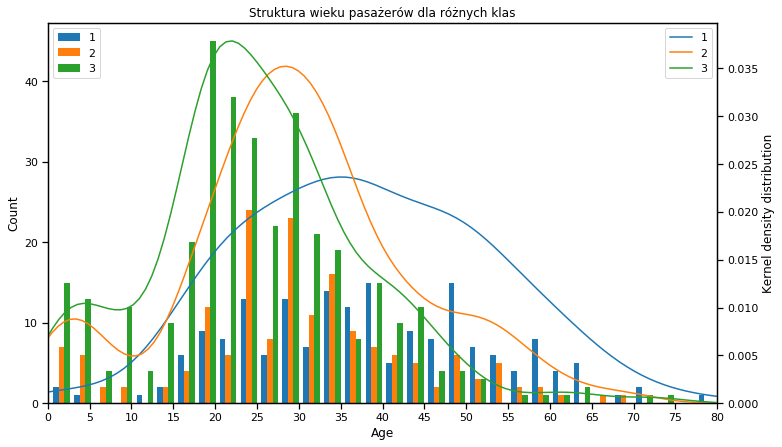

In [22]:
x1=x_train_clear.Age[x_train_clear.Pclass==1]
x2=x_train_clear.Age[x_train_clear.Pclass==2]
x3=x_train_clear.Age[x_train_clear.Pclass==3]

a = x_train_clear.Pclass.unique().tolist()
a.sort()

for ix, i in enumerate(a):
    a[ix]=str(i)

fig = plt.figure(figsize=(12,7))
ax1 = plt.axes()
ax1.set_xlabel('Age')
plt.hist([x1,x2,x3],bins=32,label=a,density=False)
plt.xticks(np.arange(0,85,step=5))
plt.xlim(0,80)
plt.legend(loc='upper left')
plt.ylabel('Count')

ax2 = ax1.twinx()
sns.distplot(x1,bins=32, hist=False, kde=True,ax=ax2,label='1')
sns.distplot(x2,bins=32, hist=False, kde=True,ax=ax2,label='2')
sns.distplot(x3,bins=32, hist=False, kde=True,ax=ax2,label='3')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ylabel('Kernel density distribution')

plt.title('Struktura wieku pasażerów dla różnych klas')
plt.show()

### 3.6. Współzależności pomiędzy danymi. 

Jako miarę współzależności pomiędzy danymi wykorzystano macierz korelacji przedstawioną poniżej. Zaprezentowano w niej współczynniki korelacji dla różnych cech (danych) w odniesieniu do najważniejszej, czyli informacji o przeżyciu. Najsilniejsze współzależności wykazywały zgodnie z przewidywaniami płeć i klasa (oraz powiązana z nią cena biletu). 

In [23]:
x_all_ohc = x_train_clear_ohc.join(y_train_clear['Survived'])
corr = x_all_ohc.corr().round(3)
corr.style.background_gradient()

In [24]:
x_train['Srvd']=y_train.Survived
x_train_clear['Srvd']=y_train_clear.Survived

###  3.7. Udział ocalonych/ofiar w podziale na klasę (1,2,3)) oraz płeć. 

Zgodnie z danymi z macierzy korelacji przedstawiono bezwzględne oraz względne ilości ofiar oraz ocalonych z uwzględnieniem kombinacji dwóch cech - płci oraz klasy. Kobiety z klas 1 i 2 miały zdecydowanie najwyższe współczynniki, ponad 90% zostało w tych przypadkach uratowanych. Z kolei ilość kobiet uratowanych z klasy 3 wyniosła już tylko połowę wyżej wymienionych wartości, a więc około 46%. 

W dalszym ciągu przewyższało to udział ocalonych mężczyzn, który w najwyższej klasie 1 wyniósł 40%, natomiast w niższych klasach zaledwie 15%. 

Count  rate [%]
Sex    Pclass State                    
female 1      dead          3      3.61
              survived     80     96.39
       2      dead          6      8.11
              survived     68     91.89
       3      dead         55     53.92
              survived     47     46.08
male   1      dead         61     60.40
              survived     40     39.60
       2      dead         84     84.85
              survived     15     15.15
       3      dead        215     84.98
              survived     38     15.02

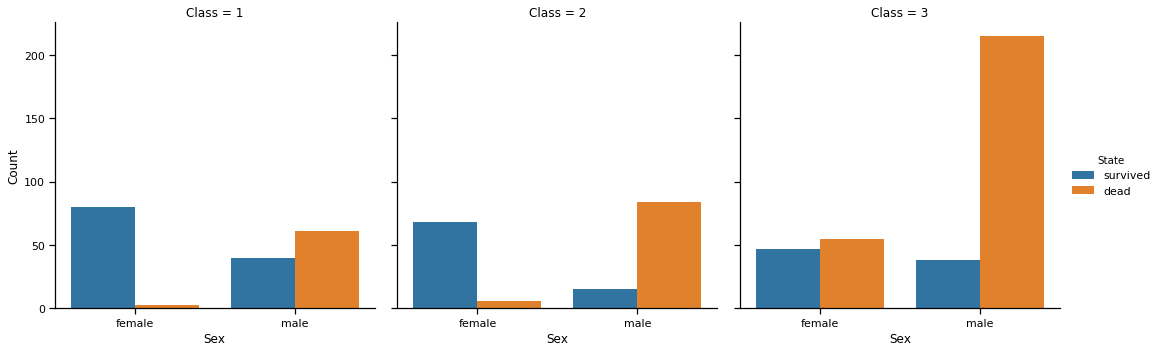

In [25]:
a1 = x_train_clear[['Sex','Pclass','Srvd']].groupby(['Sex','Pclass'])['Srvd'].value_counts().to_frame()
a1 = a1.rename(columns={'Srvd':'Count'})
a1 = a1.reset_index(level=[0,1,2])
a1 = a1.rename(columns={'Srvd':'State'})

for ix, i in enumerate(a1.State):
    if i==0:
        a1.State[ix]='dead'
    else:
        a1.State[ix]='survived'
        
g1 = sns.catplot(x='Sex', y='Count', hue='State',col='Pclass',data=a1,kind='bar')
g1.set_titles(col_template='Class = {col_name}')

class_survival = pd.DataFrame(a1.groupby(['Sex','Pclass','State'])['Count'].sum())
class_survival['total']=class_survival.groupby(['Sex','Pclass'])['Count'].sum()
class_survival['rate [%]']=(class_survival.Count/class_survival.total*100).round(2)
class_survival.drop(columns=['total'],inplace=True)
class_survival

### 3.8. Udział ocalonych/ofiar w podziale na miejsce zaokrętowania (C - Cherbourg, Q - Queenstown, S - Southampton) oraz płeć

Analogiczne liczby jak w punkcie 3.7 przedstawiono poniżej, jednak klasę zastąpiono w tym przypadku miejscem zaokrętowania. Zależności nie są już tak silne, największy udział ocalonych zaobserwowano w przypadku pasażerów z Cherbourga, a najniższy z Queenstown. Może to mieć jednak związek z udziałem klas pasażerów wsiadających na pokład w danym miejscu (wyższa klasa w Cherbourg, niższa w Queenstown), aniżeli samym wpływem miejsca zaokrętowania. 

Count  rate [%]
Sex    Embarked    State                    
female Cherbourg   dead          6      9.84
                   survived     55     90.16
       Queenstown  dead          5     41.67
                   survived      7     58.33
       Southampton dead         53     28.49
                   survived    133     71.51
male   Cherbourg   dead         45     65.22
                   survived     24     34.78
       Queenstown  dead         15     93.75
                   survived      1      6.25
       Southampton dead        300     81.52
                   survived     68     18.48

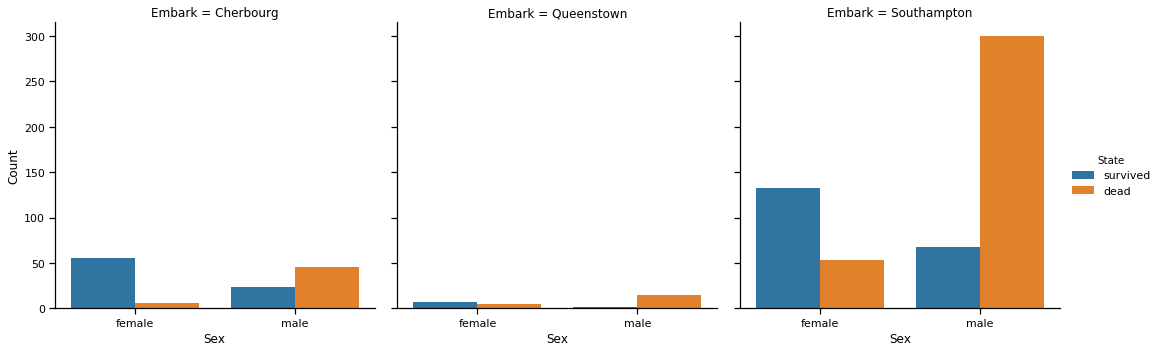

In [26]:
b1 = x_train_clear[['Sex','Embarked','Srvd']].groupby(['Sex','Embarked'])['Srvd'].value_counts().to_frame()
b1 = b1.rename(columns={'Srvd':'Count'})
b1 = b1.reset_index(level=[0,1,2])
b1 = b1.rename(columns={'Srvd':'State'})

for ix, i in enumerate(b1.State):
    if i==0:
        b1.State[ix]='dead'
    else:
        b1.State[ix]='survived'
        
for ix, i in enumerate(b1.Embarked):
    if i=='C':
        b1.Embarked[ix]='Cherbourg'
    elif i=='Q':
        b1.Embarked[ix]='Queenstown'
    else:
        b1.Embarked[ix]='Southampton'
        
g = sns.catplot(x="Sex", y="Count", hue="State",col='Embarked',data=b1,kind="bar")
col_names=['Cherbourg','Queenstown','Southampton']
g.set_axis_labels(x_var='Sex',y_var='Count')
g.set_titles(col_template='Embark = {col_name}')

embark_survival = pd.DataFrame(b1.groupby(['Sex','Embarked','State'])['Count'].sum())
embark_survival['total']=embark_survival.groupby(['Sex','Embarked'])['Count'].sum()
embark_survival['rate [%]']=(embark_survival.Count/embark_survival.total*100).round(2)
embark_survival.drop(columns=['total'],inplace=True)
embark_survival

### 3.9. Inne wzajemne współzależności:

Seria wykresów przedstawionych poniżej wyznacza szereg rozmaitych par dostępnych cech. Jako wartości na osiach y naniesiono wartości (w przybliżeniu) ciągłe (wiek/cena biletu) natomiast na osi x 9 pozostałych. Poza opisaną wyżej najsilniejszą współzależnością pomiędzy szansą na przeżycie, a płcią zauważono także, iż szanse na przeżycie znacznie spadały wśród osób starszych (wykres __Fare - Age__). Dodatkowo, potwierdzono powyższą hipotezę o niskich szansach na przeżycie pasażerów z Queenstown, co wiązało się z niższą klasą oraz ceną biletu, niż w przypadku pasażerów z Southampton oraz Cherbourg (wykresy __fare - Embarked__).  

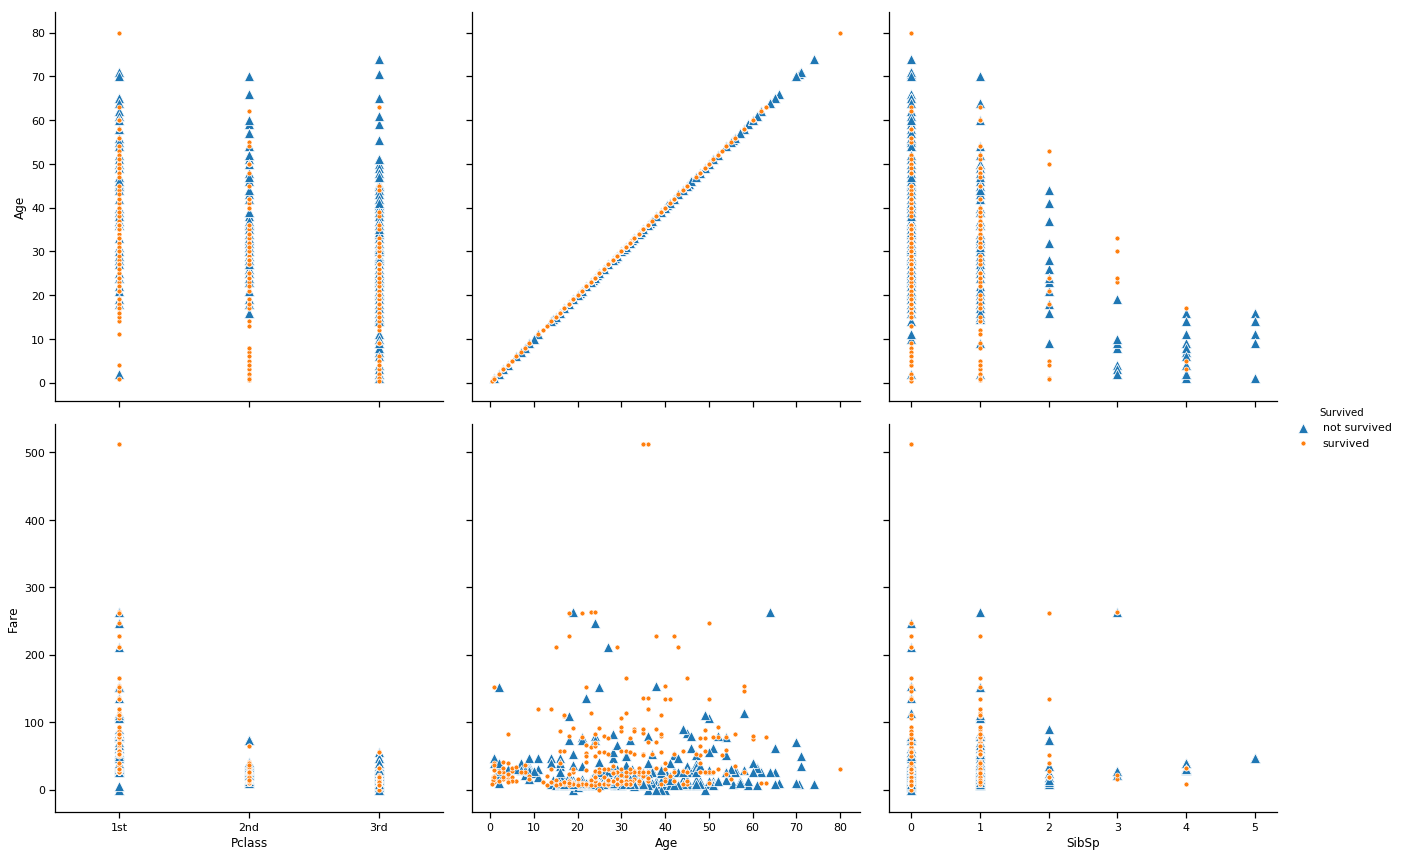

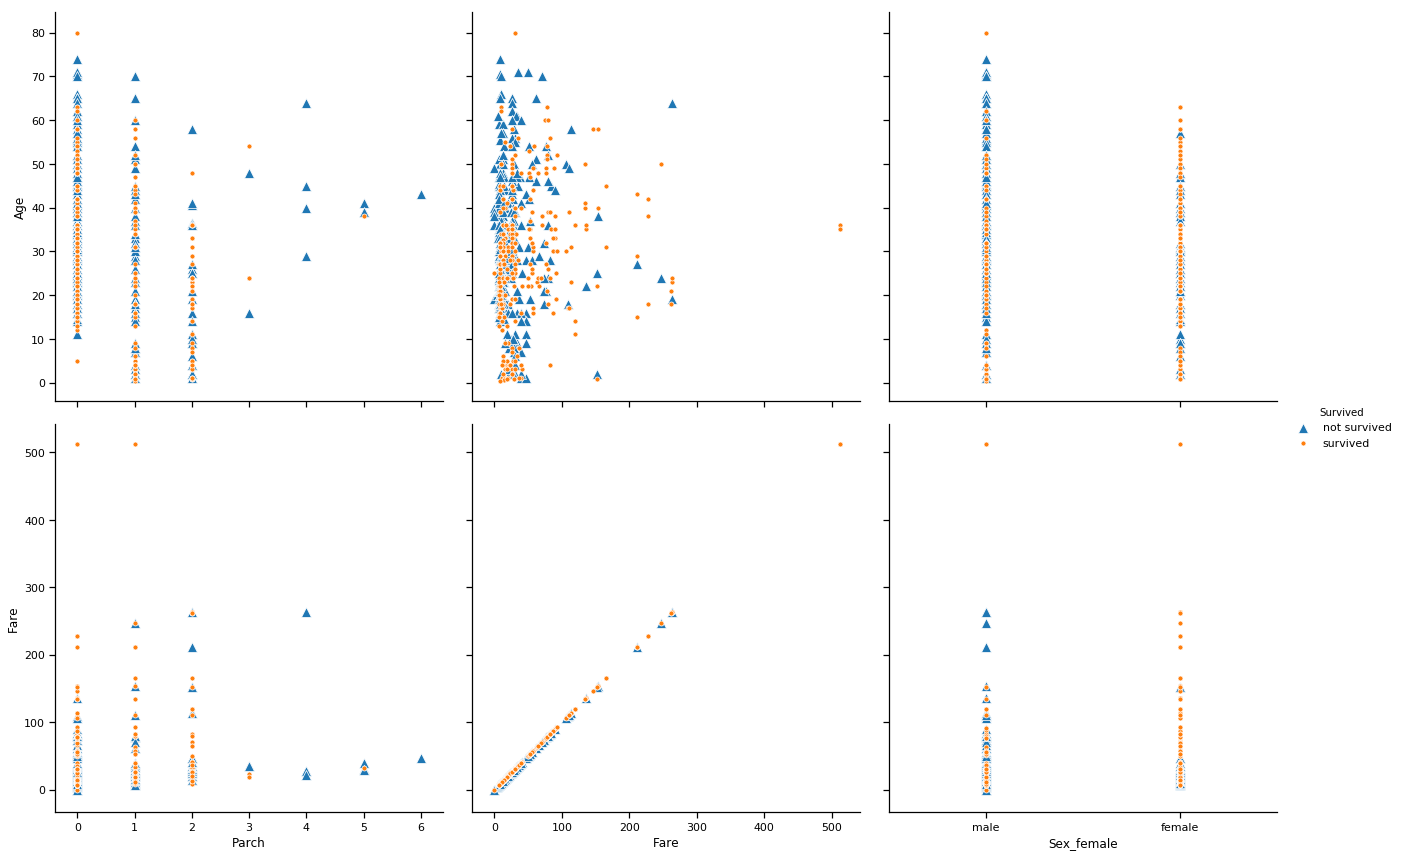

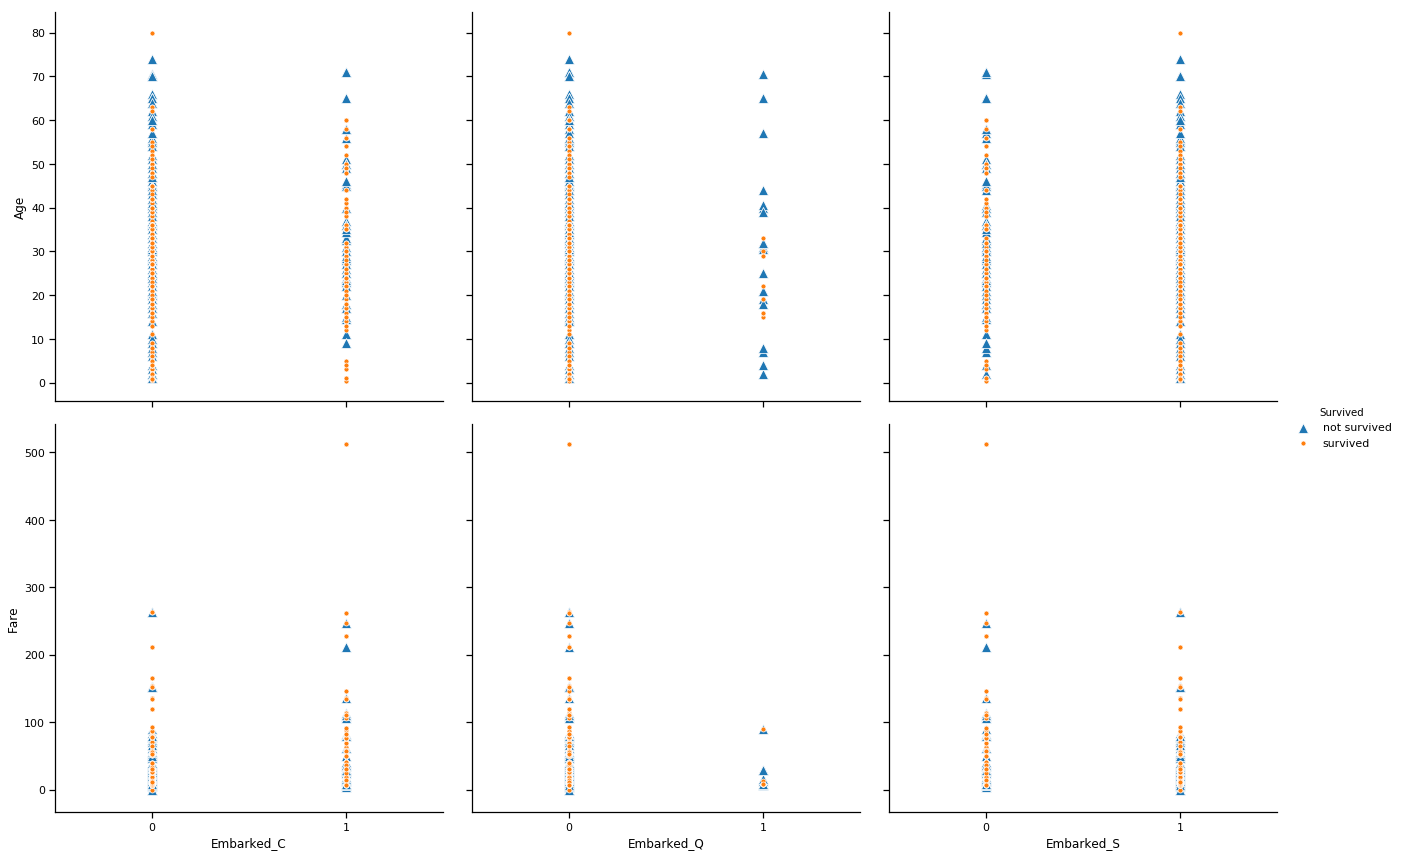

In [27]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S','Survived']
cols1 = cols[:3]
cols2=cols[3:-4]
cols3=cols[-4:-1]
dframe = x_all_ohc[cols]
dframe['Survived']=dframe['Survived'].astype('category')
dframe['Survived']=np.where(dframe.Survived==1, 'survived','not survived')
pp1 = sns.pairplot(dframe,x_vars=cols1,y_vars=['Age','Fare'], hue = "Survived", size=6,plot_kws={'s':100}, markers=['^','.'])
pp2 = sns.pairplot(dframe,x_vars=cols2,y_vars=['Age','Fare'], hue = "Survived", size=6,plot_kws={'s':100}, markers=['^','.'])
pp3 = sns.pairplot(dframe,x_vars=cols3,y_vars=['Age','Fare'], hue = "Survived", size=6,plot_kws={'s':100}, markers=['^','.'])

pp1.axes[0,0].set_xticks([1,2,3])
pp1.axes[0,0].set_xticklabels(['1st','2nd','3rd'])
pp1.axes[0,0].set(xlim=[0.5,3.5])

pp2.axes[0,2].set_xticks([0,1])
pp2.axes[0,2].set_xticklabels(['male','female'])
pp2.axes[0,2].set(xlim=[-0.5,1.5])

for i in [0,1,2]:
    pp3.axes[0,i].set_xticks([0,1])
    pp3.axes[0,i].set_xticklabels(['0','1'])
    pp3.axes[0,i].set(xlim=[-0.5,1.5])
    
plt.show()

# 4. Przygotowanie modeli predykcyjnych

Dane zostały przygotowane do wprowadzenia do modelu oraz przeanalizowane ze wskazaniem najsilniejszych współzależności. Określić je można w danej kolejności:
1. Płeć (__Sex__)
2. Klasa (__Pclass__) - względnie cena biletu (__Fare__)
3. Wiek/Dziecko (__Age/Adult__)
4. Miejsce zaokrętowania oraz rodzina 

Z tego względu w niniejszych rozważaniach będzie brane pod uwagę 5 różnych grup cech:
> 1. Najbardziej złożona - zawierająca wszystkie cechy:
    * __ Pclass ,  Age ,  SibSp ,  Parch ,  Fare ,  Sex_female ,  Embarked_C , Embarked_Q ,  Embarked_S , Adult __
2. Cechy bez miejsca zaokrętowania:
    * __ Pclass ,  Age ,  SibSp ,  Parch ,  Fare ,  Sex_female , Adult __
3. Cechy z uwzględnienieniem miejsca zaokrętowania, lecz bez członków rodziny:
    * __ Pclass ,  Age , Fare ,  Sex_female , Adult , Embarked_C , Embarked_Q ,  Embarked_S __
4. Cechy bez miejsca zaokrętowania i członków rodziny:
    * __ Pclass ,  Age , Fare ,  Sex_female , Adult __
5. Cechy bez uwzględnienia ceny biletu:
    * __ Pclass ,  Age ,  Sex_female , Adult __

In [28]:
#y_train_clear.drop(columns='Sex_female', inplace=True)
#x_train_clear_ohc.drop(columns='Srvd', inplace = True)

In [29]:
x_train_clear_ohc.head()
y_train_clear.head()
# x_test_clear_ohc.head()
# y_test_clear.head()

Survived  Sex_female
PassengerId                      
1                   0           0
2                   1           1
3                   1           1
4                   1           1
5                   0           0

### 4.1. Predykcja z wykorzystaniem modelu k najbliższych sąsiadów (k Nearest Neighbours)  

Pierwszym wykorzystanym modelem był k-Nearest Neighbours. Badano zachowanie modelu w funkcji zmiennego parametru ilości sąsiadów punktów branych pod uwagę podczas predykcji wartości wyjściowej (w granicach 1-20) dla wspomnianych 5 różnych grup zmiennych wejściowych. 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=np.arange(1,21)
def predictByKNN(cols,to_plot):
    tr = x_train_clear_ohc[cols] #train
    tt = x_test_clear_ohc[cols] #test
    result = {}
    for x in k:
        knn=KNeighborsClassifier(n_neighbors=x)
        knn.fit(tr, y_train_clear)

        predicted_output = knn.predict(tt)

        predicted_output = pd.DataFrame(predicted_output[:,0],columns=['predicted_output'])
        ix = y_test_clear.index.copy()

        o = predicted_output.set_index(ix)
        o = o.join(y_test_clear, how='outer')     
        o['acc']=np.where(o.predicted_output==o.Survived, True,False)
        #print(o.acc.value_counts())
        #print('accuracy score for {} neighbours = {}'.format(x,accuracy_score(y_test_clear, predicted_output)))
        result[x]=accuracy_score(y_test_clear, predicted_output)
    
    if to_plot==0:
        lists = sorted(result.items()) # sorted by key, return a list of tuples
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        fig = plt.figure(figsize=(10,8))
        ax1 = plt.subplot()
        ax1.plot(x,y,marker='o')
        ax1.set(xlabel='k', ylabel='accuracy', title=cols)
        ax1.grid(axis='x')
        ax1.set_xlim(min(k)-1,max(k)+1)
        ax1.set_xticks(np.linspace(1,max(k)+1,num=len(k)+1))
        plt.show()
    print('Max accuracy for k={}, acc={}'.format(max(result,key=result.get),max(result.values()).round(2)))

#### 4.1.1. Wszystkie dane

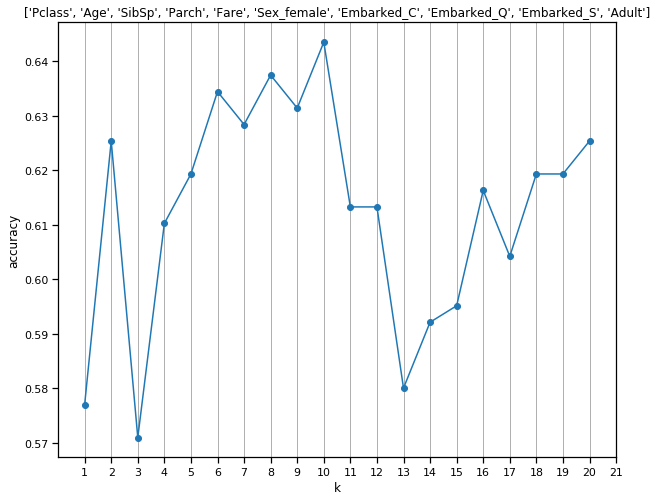

Max accuracy for k=10, acc=0.64


In [31]:
cols1 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S','Adult']
predictByKNN(cols1,0)

#### 4.1.2. Dane bez miejsca zaokrętowania 

In [32]:
cols2 = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female','Adult']
predictByKNN(cols2,1)

Max accuracy for k=10, acc=0.65


#### 4.1.3. Dane bez informacji o rodzinie 

In [33]:
cols3 = ['Pclass', 'Age', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q', 'Embarked_S','Adult']
predictByKNN(cols3,1)

Max accuracy for k=10, acc=0.64


#### 4.1.4. Dane bez informacji o rodzinie i miejscu zaokrętowania 

In [34]:
cols4 = ['Pclass', 'Age', 'Fare', 'Sex_female','Adult']
predictByKNN(cols4,1)

Max accuracy for k=8, acc=0.65


#### 4.1.5. Dane zawierające tylko klasę, wiek i płeć 

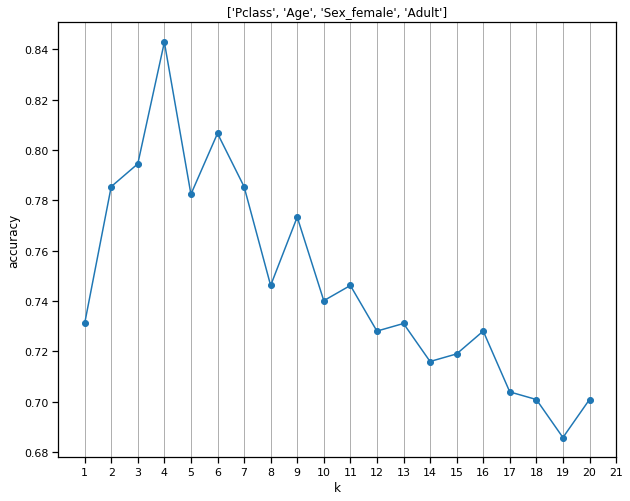

Max accuracy for k=4, acc=0.84


In [35]:
cols5 = ['Pclass', 'Age', 'Sex_female','Adult']
predictByKNN(cols5,0)

In [36]:
x_train_clear_ohc.head()
y_train_clear.head()
x_test_clear_ohc.head()
y_test_clear.head()
#x_train_clear_ohc.columns

Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1

#### Komenatrz: 
Wyniki wskazują, iż najlepszą dokładność predykcji na poziomie 0.84 osiągnięto przy ograniczonej ilości zmiennych wejściowych, a także niewielkiej liczby sąsiadów (k=4). 

Przy uwzględnianiu większej ilości parametrów wejściowych uzyskiwano słabą dokładność rzędu około 0.65 przy liczbie sąsiadów równej k=10. 

### 4.2. Predykcja z wykorzystaniem regresji logistycznej

Te same grupy sprawdzone zostaną podczas predykcji wartości przeżywalności dla modelu regresji logistycznej. 

In [37]:
from sklearn.linear_model import LogisticRegression

def predictByLR(cols,to_plot):

    lr = LogisticRegression().fit(x_train_clear_ohc[cols], y_train_clear['Survived'])
    out = lr.predict(x_test_clear_ohc[cols])
    acc = lr.score(x_test_clear_ohc[cols], y_test_clear).round(2)
    
#     out = pd.DataFrame(out, columns=['predicted_output'])
#     ix = y_test_clear.index.copy()
#     o = out.set_index(ix)
#     o = o.join(y_test_clear, how='outer')
#     o['acc']=np.where(o.predicted_output==o.Survived, True,False)
#     o.acc.value_counts()
    print('Dla danych wejściowych zawierających:\n{}\nAccuracy = {}'.format(cols,acc))

In [38]:
predictByLR(cols1,0)
predictByLR(cols2,0)
predictByLR(cols3,0)
predictByLR(cols4,0)
predictByLR(cols5,0)

Dla danych wejściowych zawierających:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Adult']
Accuracy = 0.93
Dla danych wejściowych zawierających:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Adult']
Accuracy = 0.95
Dla danych wejściowych zawierających:
['Pclass', 'Age', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Adult']
Accuracy = 0.91
Dla danych wejściowych zawierających:
['Pclass', 'Age', 'Fare', 'Sex_female', 'Adult']
Accuracy = 0.94
Dla danych wejściowych zawierających:
['Pclass', 'Age', 'Sex_female', 'Adult']
Accuracy = 0.93


#### Komentarz: 
Dokładność przewidywania modelu regresji logistycznej była zdecydowanie wyższa niż dla algorytmu k-Nearest Neighbours i oscylowała pomiędzy 0.91-0.95. Najwyższe wartości uzyskano dla grupy zmiennych wejściowych pomijającej jedynie miejsce zaokrętowania(__cols2__).

### 4.3. Predykcja z wykorzystaniem algorytmu Random Forest 

Algorytm Random Forest stanowi metodę kombinującą i uśredniającą wyniki predykcji grupy drzew decyzyjnych, z których każde stanowi samodzielny estymator. W tym przypadku badano ilość tych estymatorów w granicach 20-200 oraz wpływ tej liczby na przewidywaną dokładność. 

Podczas przedstawiania dokładności wyników zaprezentowano także istotność poszczególnych zmiennych wejściowych na wynik predykcji modelu Random Forest.

Dokładność predykcji była w większości przypadków jednakowa i wynosiła 0.82-0.83. Także jej oscylacje w każdym z przypadków związane z ilością estymatorów n były stosunkowo niewielkie. 

In [39]:
from sklearn.ensemble import RandomForestClassifier

n=np.arange(20,220,step=20)
def predictByRF(cols,to_plot):
    tr = x_train_clear_ohc[cols] #train
    tt = x_test_clear_ohc[cols] #test
    result = {}
    for x in n:
        r_f=RandomForestClassifier(n_estimators=x)
        r_f.fit(tr, y_train_clear['Survived'])
        predicted_output = r_f.predict(tt)

        predicted_output = pd.DataFrame(predicted_output, columns=['predicted_output'])
        ix = y_test_clear.index.copy()

        o = predicted_output.set_index(ix)
        o = o.join(y_test_clear, how='outer')     
        o['acc']=np.where(o.predicted_output==o.Survived, True,False)
        #print(o.acc.value_counts())
        #print('accuracy score for {} neighbours = {}'.format(x,accuracy_score(y_test_clear, predicted_output)))
        result[x]=accuracy_score(y_test_clear, predicted_output)
    
    importances = pd.DataFrame({'cecha':tr.columns,'istotnosc':np.round(r_f.feature_importances_,3)})
    importances = importances.sort_values('istotnosc',ascending=False).set_index('cecha')
    print(importances.T.head(10))
    print('\n')
    
    if to_plot==0:
        lists = sorted(result.items()) # sorted by key, return a list of tuples
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        fig = plt.figure(figsize=(10,8))
        ax1 = plt.subplot()
        ax1.plot(x,y,marker='o')
        ax1.set(xlabel='n', ylabel='accuracy', title=cols)
        ax1.grid(axis='x')
        ax1.set_xlim(min(n),max(n))
        ax1.set_xticks(np.linspace(min(n),max(n),num=len(n)))
        plt.show()
    print('Dla danych wejściowych zawierających:\n {}\n maksymalna dokładność predykcji dla n={}, acc={}\n'.format(cols,max(result,key=result.get),max(result.values()).round(2)))
    print('------------------------------------------------------------')

cecha        Age  Sex_female   Fare  Pclass  SibSp  Parch  Adult  Embarked_C  \
istotnosc  0.263       0.254  0.249   0.097  0.048  0.038  0.019       0.017   

cecha      Embarked_S  Embarked_Q  
istotnosc       0.011       0.005  


Dla danych wejściowych zawierających:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Adult']
 maksymalna dokładność predykcji dla n=20, acc=0.83

------------------------------------------------------------
cecha       Fare    Age  Sex_female  Pclass  SibSp  Parch  Adult
istotnosc  0.281  0.269        0.25   0.098  0.049  0.036  0.016


Dla danych wejściowych zawierających:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Adult']
 maksymalna dokładność predykcji dla n=80, acc=0.82

------------------------------------------------------------
cecha       Fare    Age  Sex_female  Pclass  Embarked_C  Adult  Embarked_S  \
istotnosc  0.298  0.294       0.256   0.103       0.018  0.016        0.0

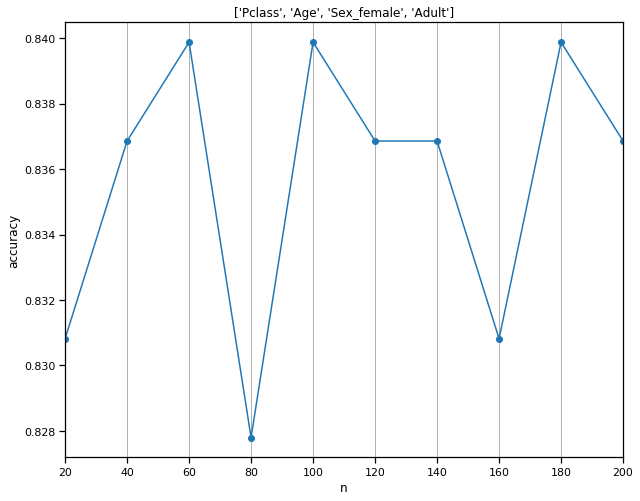

Dla danych wejściowych zawierających:
 ['Pclass', 'Age', 'Sex_female', 'Adult']
 maksymalna dokładność predykcji dla n=60, acc=0.84

------------------------------------------------------------


In [40]:
predictByRF(cols1,1)
predictByRF(cols2,1)
predictByRF(cols3,1)
predictByRF(cols4,1)
predictByRF(cols5,0)

### 4.4. Regresja logistyczna z wyszczególnieniem prawdopodobieństwa ocalenia.

Ostatnim wykorzystanym modelem była regresja logistyczna przedstawiająca tym razem prawdopodobieństwo pozytywnej odpowiedzi predykcji, a więc ocalenia danego pasażera. Uwzględniono tym razem wszystkie zmienne wejściowe i zobrazowano na wykresie prawdopodobieństwo uratowania pasażera o danym ID. Zaprezentowano także 5 przykładowych odpowiedzi modelu. 

In [41]:
def predictByLR_prob(cols,to_plot):
    train = x_train_clear_ohc[cols].copy()
    test = x_test_clear_ohc[cols].copy()
    lr = LogisticRegression().fit(train, y_train_clear['Survived'])
    out = lr.predict_proba(test)
    survival_probability = out[:,1].round(2)
    
    ix = test.index.copy()
    survival_probability = pd.DataFrame(survival_probability, index=ix, columns=['survival_probability'])
    test = test.join(survival_probability, how='outer')

    return test

def plotProb(df):
    fig = plt.figure(figsize=(20,6))
   
    alphas = np.linspace(0.1, 1, 10)
    rgba_colors = np.zeros((10,4))

    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alphas
    plt.scatter(x=df.index, y = df.survival_probability)
    plt.xlabel('ID pasażera')
    plt.ylabel('Prawdopodobieństwo ocalenia')
    plt.title('Prawdopodobieństwo ocalenia pasażerów Titanica (zbiór testowy)')
    plt.xlim(min(df.index),max(df.index))
    plt.grid(axis='y')
    plt.show()

def getProbabilityOfSurvival(dframe, i_d):
        a = df.loc[i_d]
        sex='Kobieta'
        if a['Sex_female']==0:
            sex='Mężczyzna'
        print('\nDane pasażera:\n{}, {:.0f} lata, klasa {:.0f}, opłata za bilet {}'.format(sex,a['Age'].round(0),a['Pclass'].round(0),a['Fare'].round(2)))
        print('Prawdopodobieństwo przeżycia: {}'.format(a['survival_probability']))

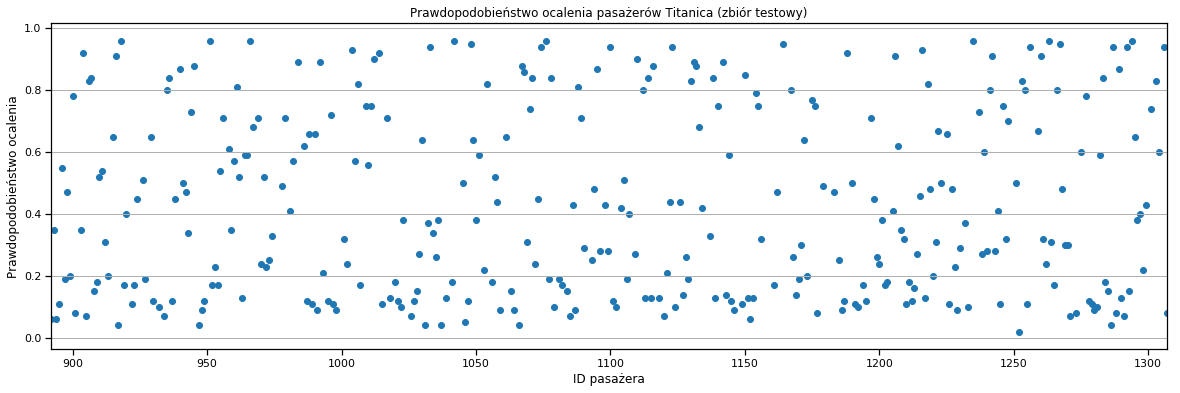


Dane pasażera:
Mężczyzna, 2 lata, klasa 2, opłata za bilet 23.0
Prawdopodobieństwo przeżycia: 0.41

Dane pasażera:
Kobieta, 23 lata, klasa 1, opłata za bilet 83.16
Prawdopodobieństwo przeżycia: 0.96

Dane pasażera:
Mężczyzna, 47 lata, klasa 1, opłata za bilet 227.52
Prawdopodobieństwo przeżycia: 0.48

Dane pasażera:
Kobieta, 30 lata, klasa 2, opłata za bilet 13.86
Prawdopodobieństwo przeżycia: 0.8

Dane pasażera:
Kobieta, 48 lata, klasa 1, opłata za bilet 79.2
Prawdopodobieństwo przeżycia: 0.87


In [42]:
df = predictByLR_prob(cols1,0)
plotProb(df)

passengers = [981,1042,1094,1112,1289]
for i in passengers:
    getProbabilityOfSurvival(df,i)

# 5. Podsumowanie 